In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
#Loading the dataset
DF=pd.read_excel("/content/ABC_Employee_dataset.xlsx")
DF

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


# A. PREPROCESSING

In [106]:
#Showing the missing values
#---------------------------

print("Missing values per column:\n", DF.isnull().sum())

DF

Missing values per column:
 Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [107]:
#Ensuring correct datatypes
#----------------------------
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [108]:
#Fixing incorrect values of Height
#---------------------------------

# Correct height column by replacing it with random no.s between 150 & 180
DF["Height"]=np.random.randint(150,181,size=len(DF))

print(DF['Height'].head(5),'\n')

#Show summary of height
print(DF[['Height']].describe().round(1))

0    168
1    152
2    171
3    161
4    159
Name: Height, dtype: int64 

       Height
count   458.0
mean    164.9
std       8.8
min     150.0
25%     158.0
50%     165.0
75%     172.0
max     180.0


In [109]:
#--------Fixing faulty values of Salary---------
#-----------------------------------------------

#Check the dtype of salary
print("Salary column datatype:", DF['Salary'].dtype)

#Check for missing values
print("\nMissing salary values:", DF['Salary'].isna().sum())

#Fill missing salary with the median
median_Salary = DF['Salary'].median()
DF['Salary'] = DF['Salary'].fillna(median_Salary)

# Check negative or zero salaries (not realistic)
print("\nUnrealistic salaries:")
print(DF[DF['Salary'] <= 0])

#Show summary of Salary
print(DF[['Salary']].describe().round(1))

Salary column datatype: float64

Missing salary values: 11

Unrealistic salaries:
Empty DataFrame
Columns: [Name, Team, Number, Position, Age, Height, Weight, College, Salary]
Index: []
           Salary
count       458.0
mean    4785987.8
std     5172406.2
min       30888.0
25%     1100150.5
50%     2836186.0
75%     6323553.0
max    25000000.0


In [110]:
# -----------Fixing age columns-------------
#------------------------------------------

#Check the dtype of Age
print("Age column datatype:", DF['Age'].dtype)

# Convert to numeric, change invalid values to NaN
DF['Age']=pd.to_numeric(DF['Age'],errors='coerce')

#Show summary of Age
print(DF['Age'].describe().round(1))

Age column datatype: int64
count    458.0
mean      26.9
std        4.4
min       19.0
25%       24.0
50%       26.0
75%       30.0
max       40.0
Name: Age, dtype: float64


In [111]:
#Viewing the modified preprocessed dataset
DF

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,168,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,152,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,171,205,Boston University,2836186.0
3,R.J. Hunter,Boston Celtics,28,SG,22,161,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,159,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,168,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,176,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,172,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,167,231,Kansas,947276.0


In [112]:
#Saving the new dataframe to a new exel file
DF.to_excel("ABC_Employee_analysis_preprocessed.xlsx",index=False)

In [113]:
#Viewing the directory
import os
os.listdir()

['.config',
 'ABC_Employee_dataset.xlsx',
 'ABC_Employee_analysis_preprocessed.xlsx',
 'sample_data']

# B. ANALYSIS TASKS

 1. Employee distriburion with percentage

---





In [174]:
 # --------ANALYSIS------
 #-------------------------
team_count=DF['Team'].value_counts()
team_percent = (team_count / len(DF) * 100) .round(2)

DF1=pd.DataFrame({'Count':team_count,'Percent':team_percent})
print( DF1)


                        Count  Percent
Team                                  
New Orleans Pelicans       19     4.15
Memphis Grizzlies          18     3.93
Utah Jazz                  16     3.49
Milwaukee Bucks            16     3.49
New York Knicks            16     3.49
Boston Celtics             15     3.28
Los Angeles Clippers       15     3.28
Los Angeles Lakers         15     3.28
Phoenix Suns               15     3.28
Sacramento Kings           15     3.28
Brooklyn Nets              15     3.28
Philadelphia 76ers         15     3.28
Toronto Raptors            15     3.28
Golden State Warriors      15     3.28
Indiana Pacers             15     3.28
Detroit Pistons            15     3.28
Cleveland Cavaliers        15     3.28
Chicago Bulls              15     3.28
Houston Rockets            15     3.28
San Antonio Spurs          15     3.28
Atlanta Hawks              15     3.28
Dallas Mavericks           15     3.28
Charlotte Hornets          15     3.28
Miami Heat               

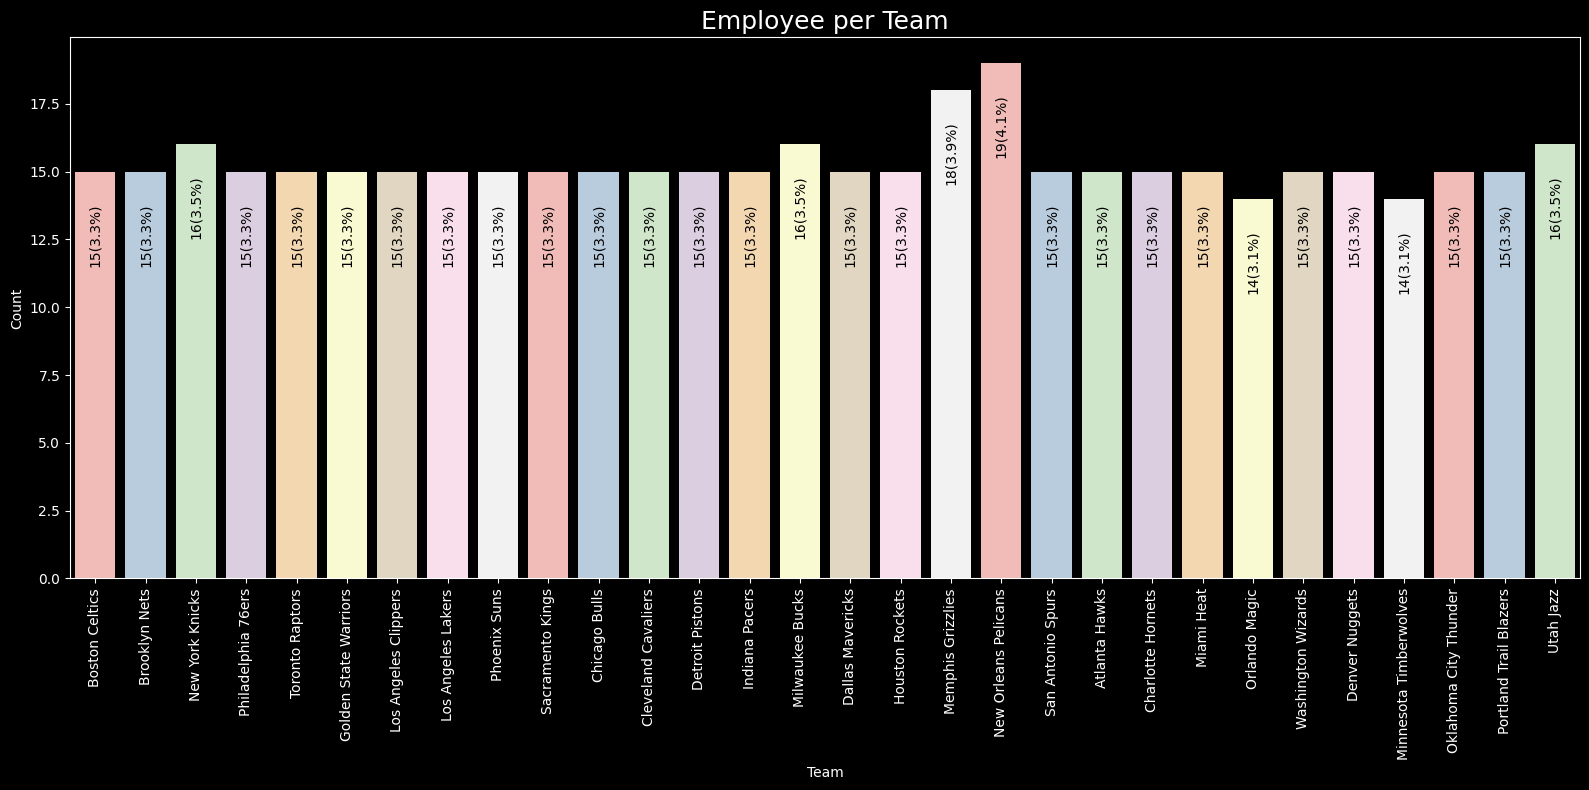

In [222]:
#-------VISUALIZATION -countplot---------
#---------------------------------------
plt.style.use("dark_background")
plt.figure(figsize=(16,8))

ax = sns.countplot(x="Team", hue="Team", data=DF, palette="Pastel1", legend=False)

# Loop for each bar
for i in ax.patches:

  x=i.get_x() + i.get_width()/2
  y=i.get_height() - 3.5
  count = int(i.get_height())
  percent = (i.get_height() / len(DF)) * 100
  percent_color = "black"
    # Format: "Count (Percent%)"
  text = f"{count}({percent:.1f}%)"

    # Add text above bar
  ax.annotate(
      text,(x,y),
      ha='center',
      va='bottom',
      fontsize=10,
      rotation=90,
      color=percent_color)

plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Count")
plt.title("Employee per Team",fontsize=18)
plt.tight_layout()
plt.show()


2. Employee segregation by position

---



In [223]:
#-----------ANALYSIS----------
#-----------------------------
position_count=DF['Position'].value_counts()
print(position_count)


Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


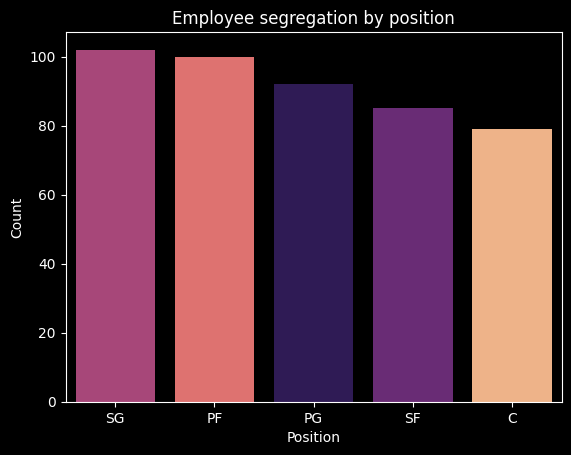

In [227]:

#--------VISUALISATION- countplot -------
#--------------------------------------
plt.style.use("dark_background")
plt.figure()
sns.countplot(
    x='Position',
    data=DF,
    hue='Position',
    order=position_count.index,
    palette='magma')

plt.title('Employee segregation by position',fontsize=12)
plt.ylabel('Count')
plt.xlabel('Position')
plt.show()

3. Predominant Age group

---



In [196]:
#-----------ANALYSIS----------
#-----------------------------
bins = [0,20,25,35,45]
labels = ['<20','21-25','26-35','36-45']

DF['age_grp']= pd.cut(DF['Age'],bins=bins,labels=labels
                      )
age_grp_counts=DF['age_grp'].value_counts().sort_index()
predominant_age_grp=age_grp_counts.idxmax()

print("Age group counts\n",age_grp_counts)

print("\n\nPredominant age group=",predominant_age_grp)


Age group counts
 age_grp
<20       21
21-25    179
26-35    235
36-45     23
Name: count, dtype: int64


Predominant age group= 26-35


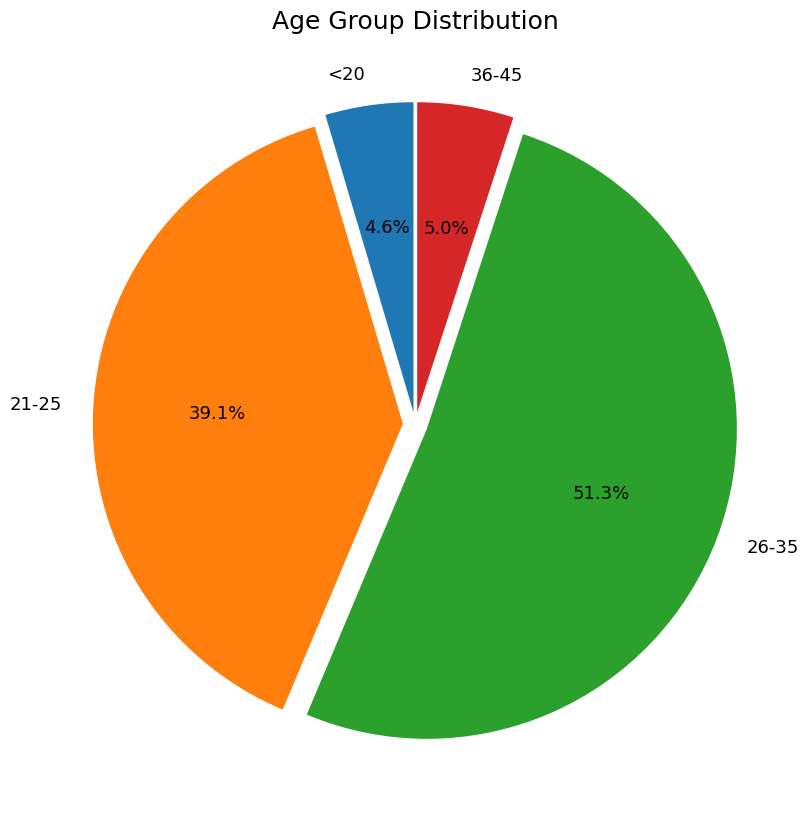

In [215]:
#--------VISUALISATION- piechart -------
#--------------------------------------

plt.style.use("default")

plt.figure(figsize=(10,12))
explode = [0.04] * len(age_grp_counts)

plt.pie(
    age_grp_counts.values,
    labels=age_grp_counts.index,
    explode=explode,
    autopct='%1.1f%%',
    labeldistance=1.10,
    textprops={'fontsize': 13},
    startangle=90,

    )

plt.title("Age Group Distribution",fontsize=18)
plt.show()

4.Salary expenditure by team & position

---



In [205]:
#-----------ANALYSIS----------
#-----------------------------

# Team with Highest salary
team_salary=DF.groupby('Team')['Salary'].sum().sort_values(ascending=False)
print("Total Salary per team",team_salary)
t_s_max=team_salary.idxmax()
print("\nTeam with highest salary=",t_s_max)

# Position with highest salary
pos_salary=DF.groupby('Position')['Salary'].sum()
print("\n\nTotal Salary per position",pos_salary)
p_s_max=pos_salary.idxmax()
print("\nPosition with highest salary=",p_s_max)

Total Salary per team Team
Cleveland Cavaliers       109824875.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Miami Heat                 88188045.0
Memphis Grizzlies          87895624.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Charlotte Hornets          78340920.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Denver Nuggets             62958116.0
Minnesota Timberwolves     62545883.0
Boston Celtics         

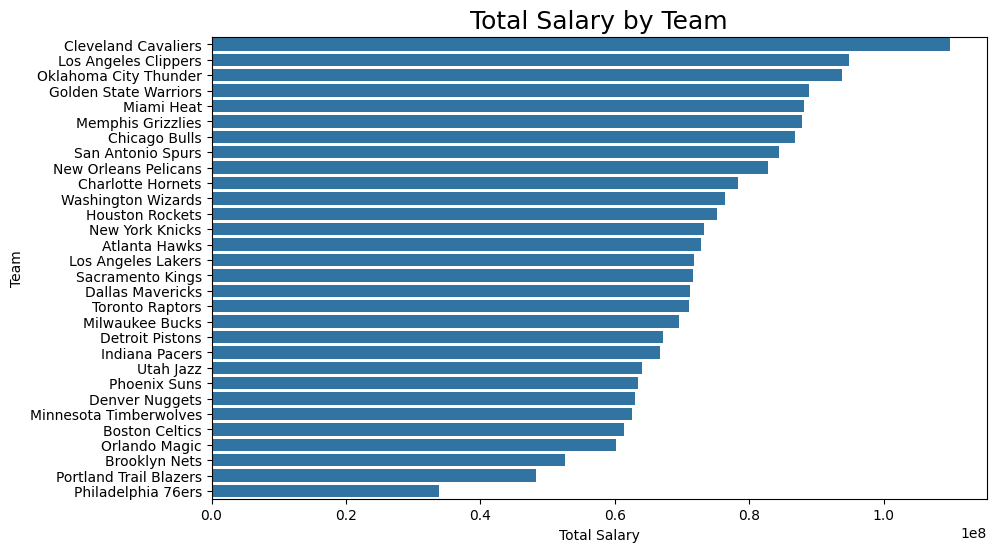

In [213]:
#--------VISUALISATION- bar chart -------
#-----------------------------------------

# Team with Highest salary
team_salary_sorted = team_salary.sort_values(ascending=False)

plt.style.use("default")
plt.figure(figsize=(10,6))

sns.barplot(y=team_salary_sorted.index,
            x=team_salary_sorted.values,
           )

plt.title("Total Salary by Team",fontsize=18)
plt.ylabel("Team")
plt.xlabel("Total Salary")
plt.show()



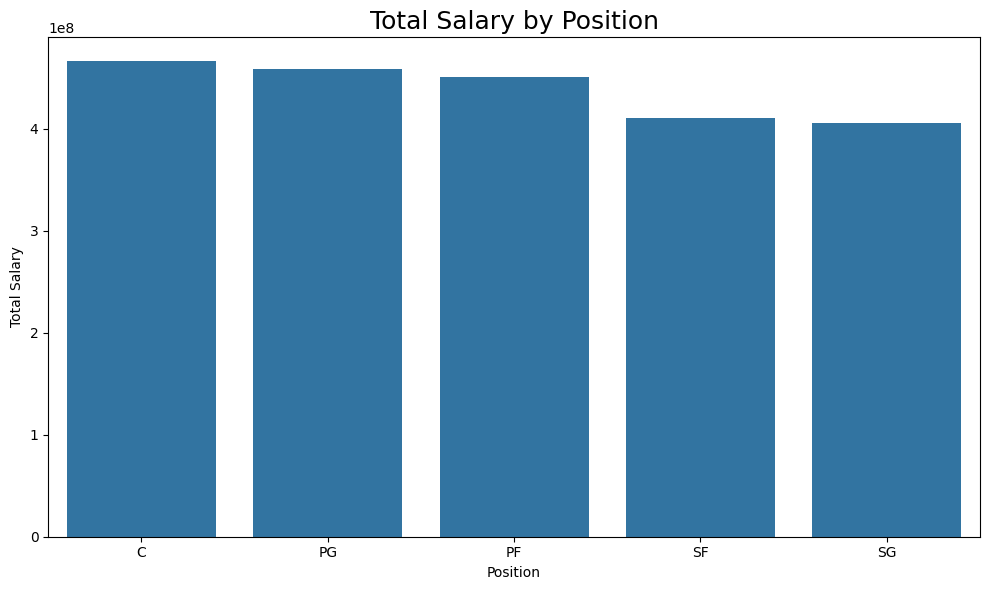

In [218]:
# Position with highest salary
pos_salary_sorted = pos_salary.sort_values(ascending=False)

plt.style.use("default")
plt.figure(figsize=(10,6))
plt.style.use("default")
sns.barplot(x=pos_salary_sorted.index,
            y=pos_salary_sorted.values,
           )

plt.title("Total Salary by Position",fontsize=18)
plt.ylabel("Total Salary")
plt.tight_layout()
plt.show()

5. Age vs salary correlation

---



Correltion between age & salary: 0.2091 



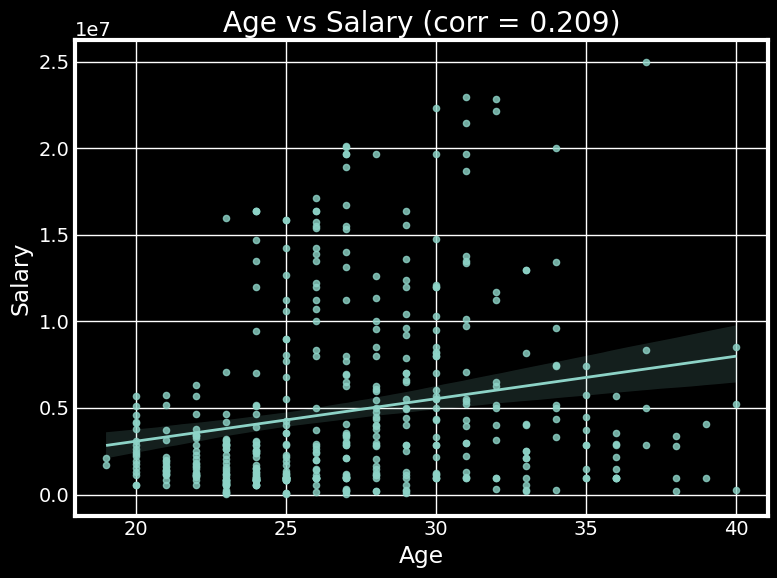

In [161]:
#-----------ANALYSIS----------
#-----------------------------
corr = DF['Age'].corr(DF['Salary'])
print("Correltion between age & salary:", round(corr, 4),'\n')


#--------VISUALISATION- scatterplot -------
#-----------------------------------------
plt.figure(figsize=(8,6))

sns.regplot(data=DF, x='Age', y='Salary', scatter_kws={'s':20}, line_kws={'linewidth':2})
plt.title(f"Age vs Salary (corr = {corr:.3f})")
plt.tight_layout()
plt.show()

# C. INSIGHTS

In [ ]:
'''
1. Team distribution:
  - New Orlands Pelicans is the largest team with 4.1 % of employees.
  - Minnesota Timberwolves is the smallest with 3% of employees.
  - Majority (23) of teams have 15 no. of employees.

2. Positions:
 - Most common position is SG (102 employees).
 - PF & SG's are the common positions.
 - Minimum number of employees fall in C position

3. Age distribution:
 - Predominant age group in the company is 26-35 years with 51.3 %.
 - Least no. of employees(4.6%) belongs to the age category less than 20 years.

4. Analysis of salary
 - The highest salary expenditure is in team 'Cleveland Cavaliers. This team have several high paid employees.
 - The position 'C' go the highest salary.

5. Age salary correlation
 - Correlation = 0.209 : weak realtionship.
 - Age has no effect on salary.
'''